In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
from sklearn.impute import SimpleImputer

In [3]:
data=pd.read_csv('C:/Users/dell/Desktop/Data Science/covid-dataset/covid_19_clean_complete.csv')

In [5]:
data.head(10)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa
5,NaN,Antigua and Barbuda,17.06080,-61.796400,2020-01-22,0,0,0,0,Americas
6,NaN,Argentina,-38.41610,-63.616700,2020-01-22,0,0,0,0,Americas
7,NaN,Armenia,40.06910,45.038200,2020-01-22,0,0,0,0,Europe
8,Australian Capital Territory,Australia,-35.47350,149.012400,2020-01-22,0,0,0,0,Western Pacific
9,New South Wales,Australia,-33.86880,151.209300,2020-01-22,0,0,0,0,Western Pacific


In [6]:
data.drop(['Province/State'],axis=1,inplace=True)

In [10]:
data.head()

,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,Region
0,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [8]:
data.rename(columns={'Country/Region':'Country','WHO Region':'Region'},inplace=True)

In [11]:
data.head()

,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,Region
0,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [12]:
data.describe()

,Lat,Long,Confirmed,Deaths,Recovered,Active
count,49068.000000,49068.000000,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04
mean,21.433730,23.528236,1.688490e+04,884.179160,7.915713e+03,8.085012e+03
std,24.950320,70.442740,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01
25%,7.873054,-15.310100,4.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,23.634500,21.745300,1.680000e+02,2.000000,2.900000e+01,2.600000e+01
75%,41.204380,80.771797,1.518250e+03,30.000000,6.660000e+02,6.060000e+02
max,71.706900,178.065000,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    49068 non-null  object 
 1   Lat        49068 non-null  float64
 2   Long       49068 non-null  float64
 3   Date       49068 non-null  object 
 4   Confirmed  49068 non-null  int64  
 5   Deaths     49068 non-null  int64  
 6   Recovered  49068 non-null  int64  
 7   Active     49068 non-null  int64  
 8   Region     49068 non-null  object 
dtypes: float64(2), int64(4), object(3)
memory usage: 3.4+ MB


In [18]:
data.head(10)

,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,Region
0,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa
5,Antigua and Barbuda,17.06080,-61.796400,2020-01-22,0,0,0,0,Americas
6,Argentina,-38.41610,-63.616700,2020-01-22,0,0,0,0,Americas
7,Armenia,40.06910,45.038200,2020-01-22,0,0,0,0,Europe
8,Australia,-35.47350,149.012400,2020-01-22,0,0,0,0,Western Pacific
9,Australia,-33.86880,151.209300,2020-01-22,0,0,0,0,Western Pacific


In [19]:
data2=data.groupby('Country')[['Country','Confirmed','Deaths','Recovered']].sum().reset_index()

In [20]:
data2

,Country,Confirmed,Deaths,Recovered
0,Afghanistan,1936390,49098,798240
1,Albania,196702,5708,118877
2,Algeria,1179755,77972,755897
3,Andorra,94404,5423,69074
4,Angola,22662,1078,6573
...,...,...,...,...
182,West Bank and Gaza,233461,1370,61124
183,Western Sahara,901,63,648
184,Yemen,67180,17707,23779
185,Zambia,129421,2643,83611


In [21]:
data3=data.groupby(['Country','Date'])[['Country','Date','Confirmed','Deaths','Recovered']].sum().reset_index()

In [22]:
data3

,Country,Date,Confirmed,Deaths,Recovered
0,Afghanistan,2020-01-22,0,0,0
1,Afghanistan,2020-01-23,0,0,0
2,Afghanistan,2020-01-24,0,0,0
3,Afghanistan,2020-01-25,0,0,0
4,Afghanistan,2020-01-26,0,0,0
...,...,...,...,...,...
35151,Zimbabwe,2020-07-23,2124,28,510
35152,Zimbabwe,2020-07-24,2296,32,514
35153,Zimbabwe,2020-07-25,2434,34,518
35154,Zimbabwe,2020-07-26,2512,34,518


In [30]:
data4=data3[data3['Confirmed']>500]

In [31]:
data4

,Country,Date,Confirmed,Deaths,Recovered
79,Afghanistan,2020-04-10,521,15,32
80,Afghanistan,2020-04-11,555,18,32
81,Afghanistan,2020-04-12,607,18,32
82,Afghanistan,2020-04-13,665,21,32
83,Afghanistan,2020-04-14,714,23,40
...,...,...,...,...,...
35151,Zimbabwe,2020-07-23,2124,28,510
35152,Zimbabwe,2020-07-24,2296,32,514
35153,Zimbabwe,2020-07-25,2434,34,518
35154,Zimbabwe,2020-07-26,2512,34,518


In [62]:
#x=np.linspace(0,10,1000)
#y=np.sin(x)
#plt.plot(x,y)

In [63]:
#plt.scatter(x[::10],y[::10],color='green')

In [64]:
#plt.plot(x[::10],y[::10],'-.g')

In [65]:
#plt.plot(x,y,color='b')
#plt.plot(x,np.cos(x),color='g')
#plt.plot(x[:200],np.abs(x)[:200],color='r')

In [71]:
countries=data3['Country'].unique()
len(countries)

187

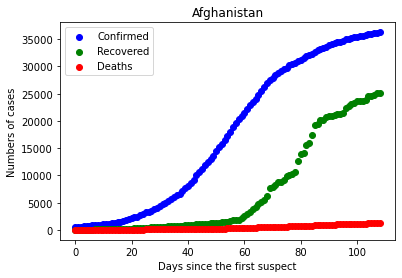

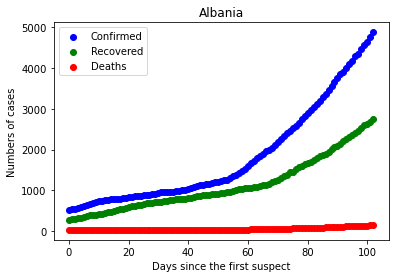

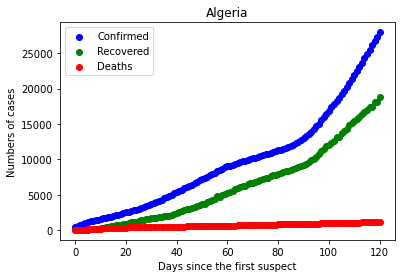

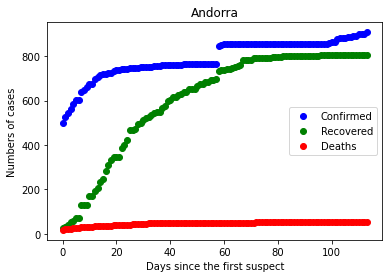

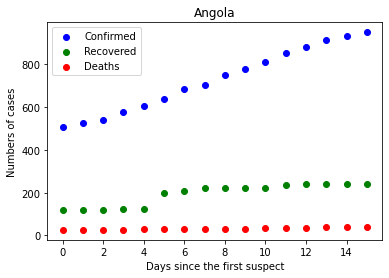

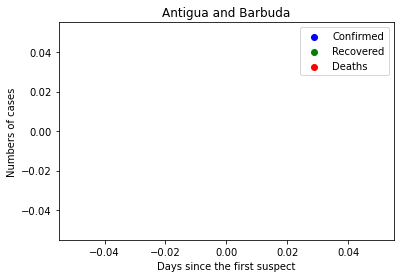

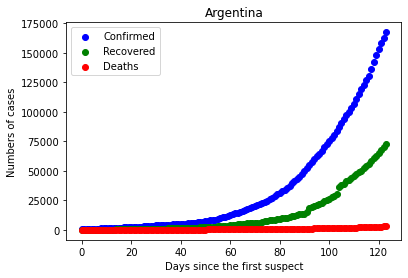

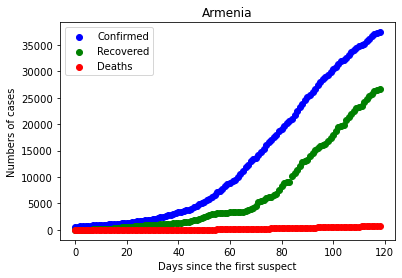

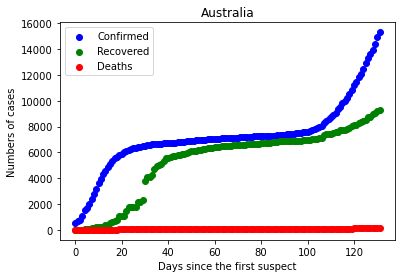

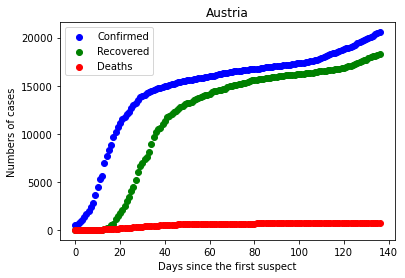

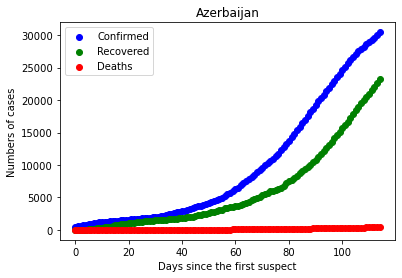

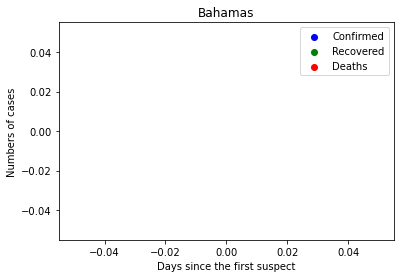

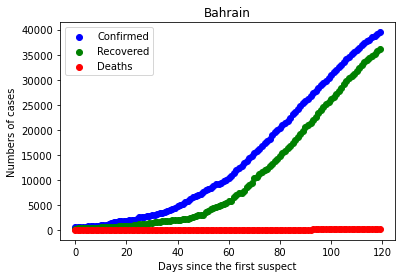

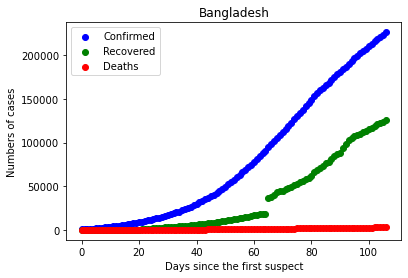

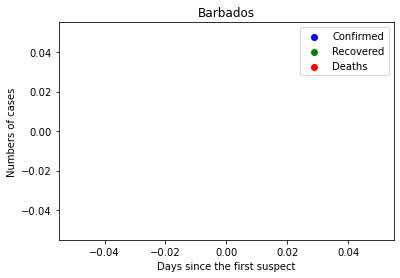

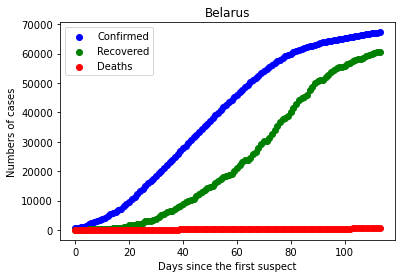

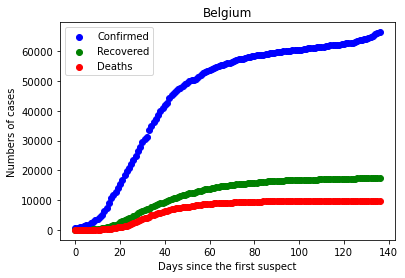

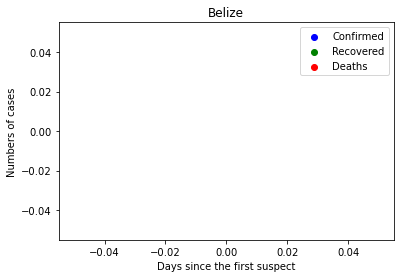

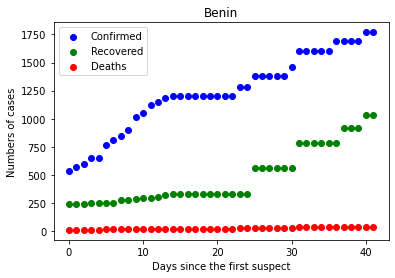

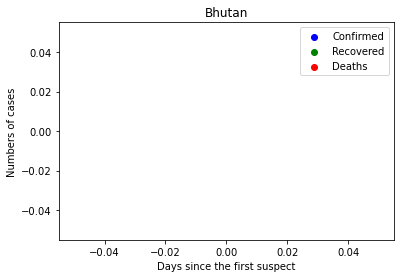

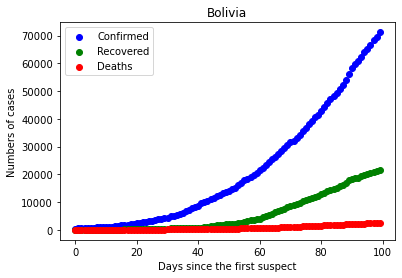

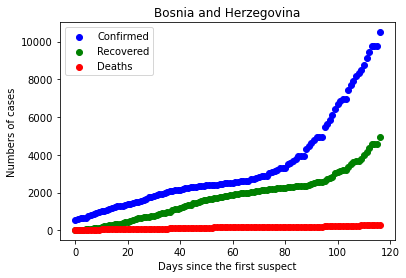

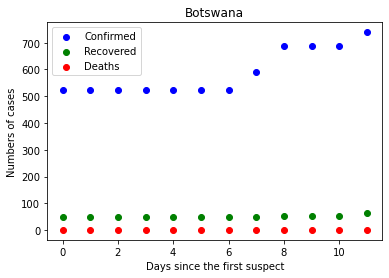

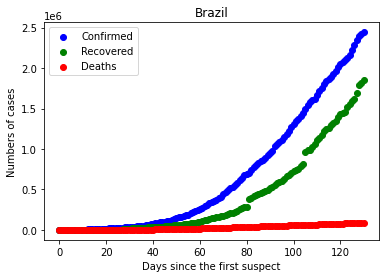

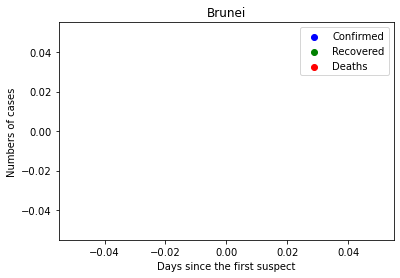

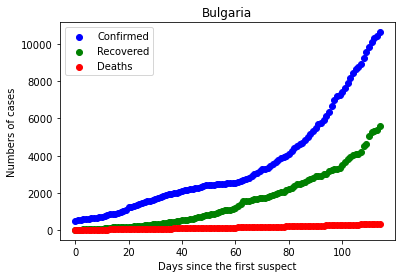

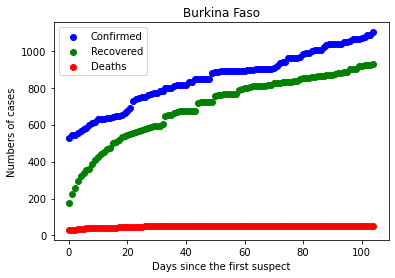

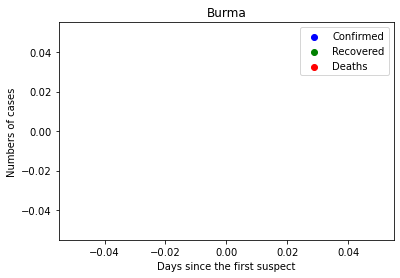

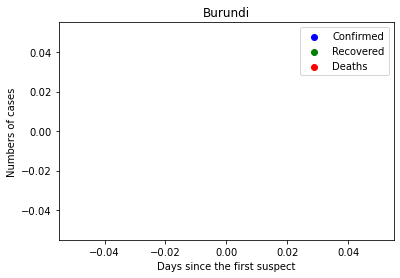

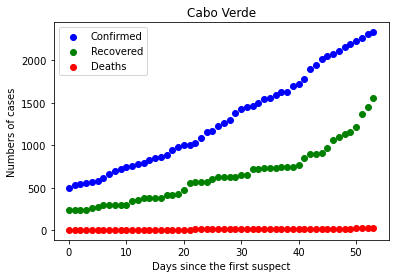

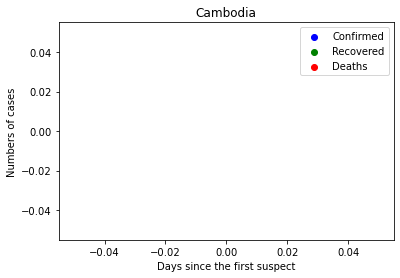

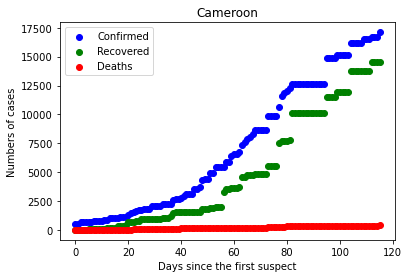

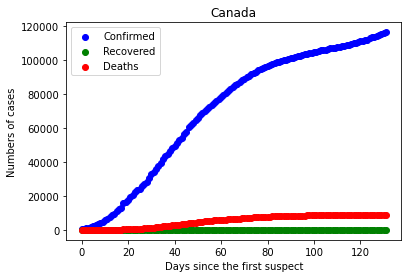

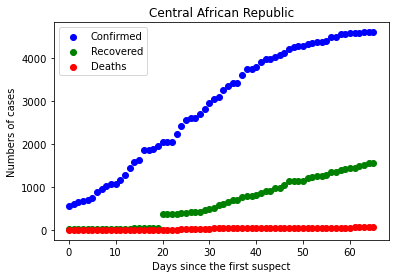

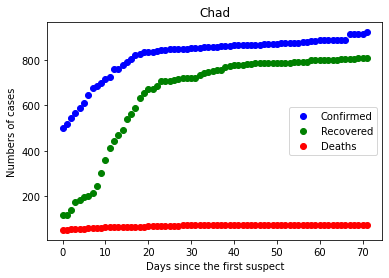

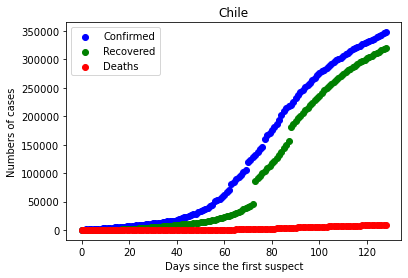

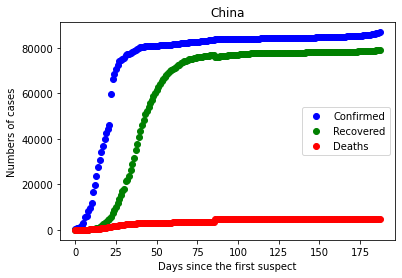

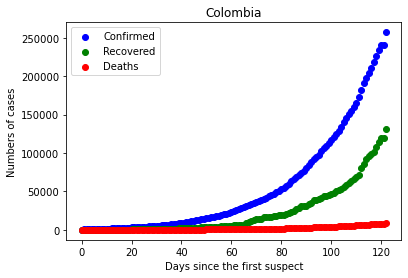

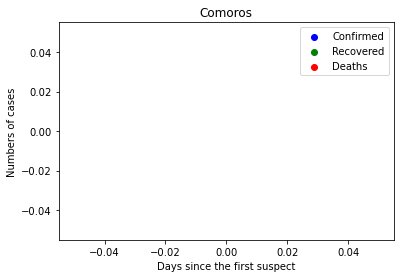

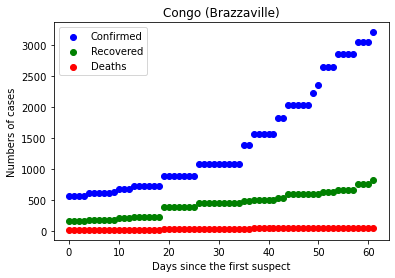

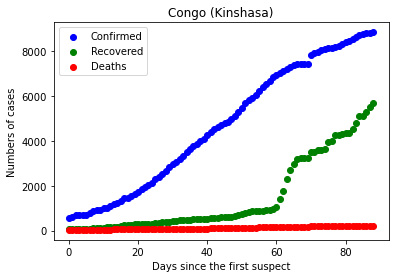

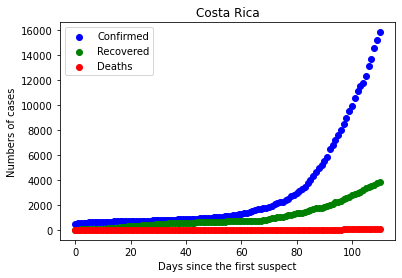

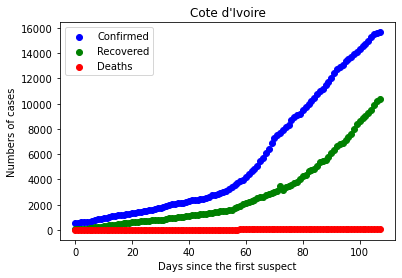

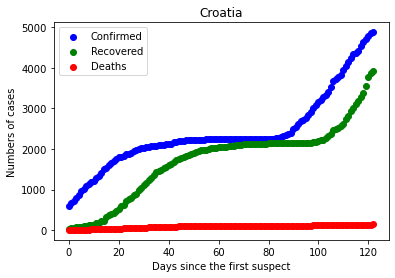

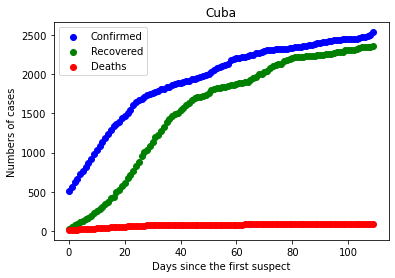

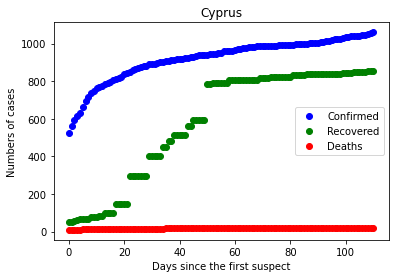

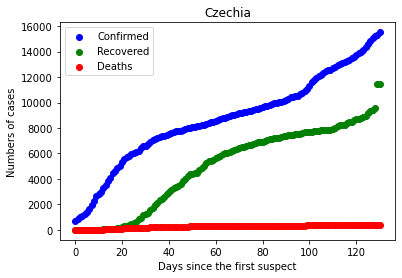

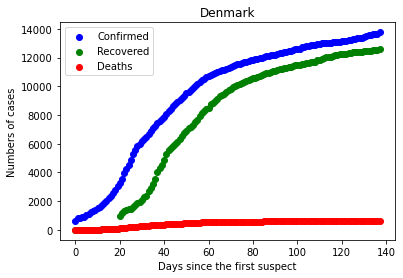

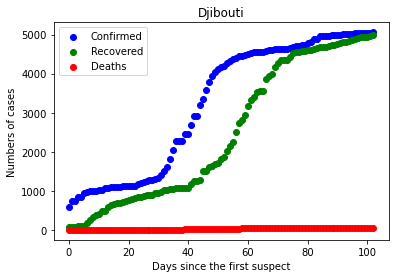

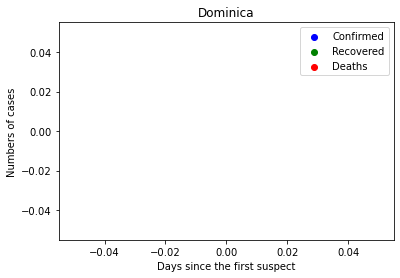

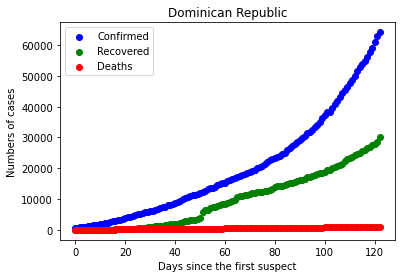

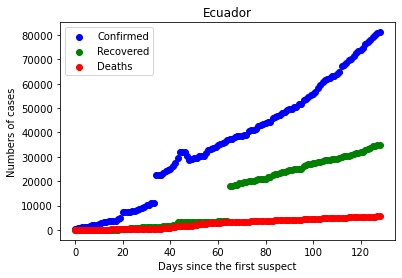

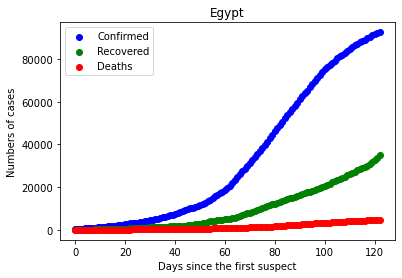

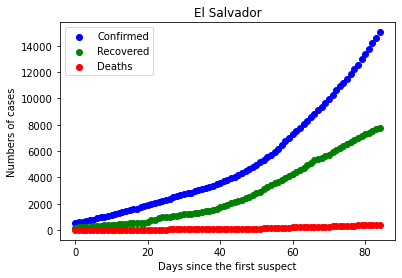

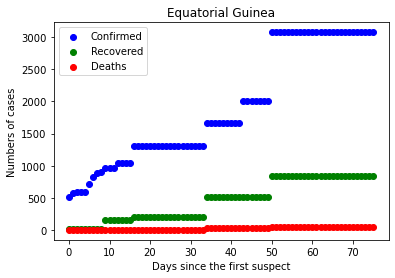

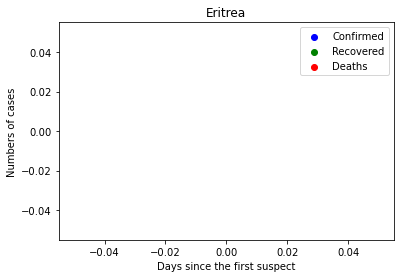

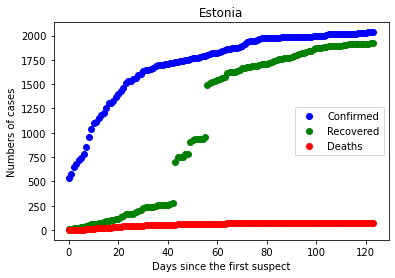

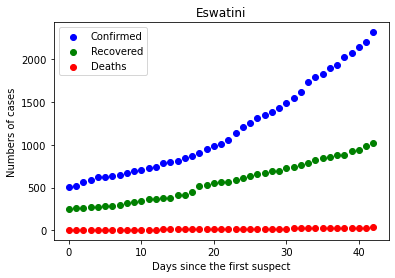

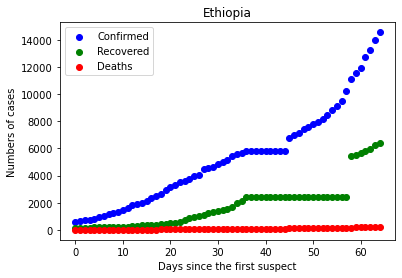

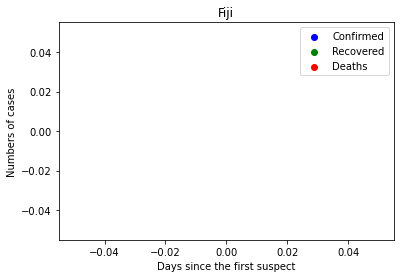

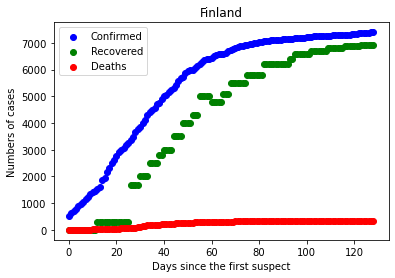

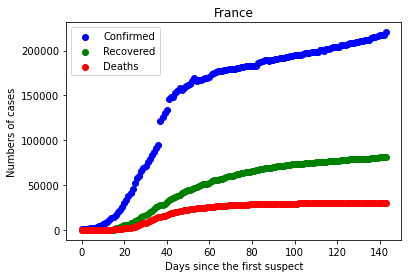

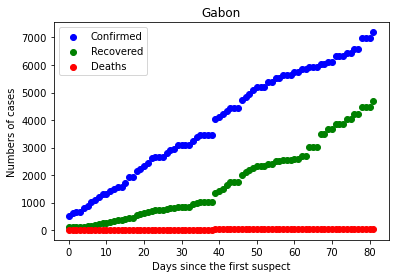

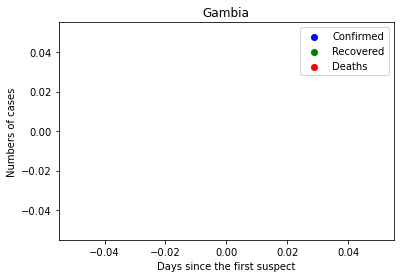

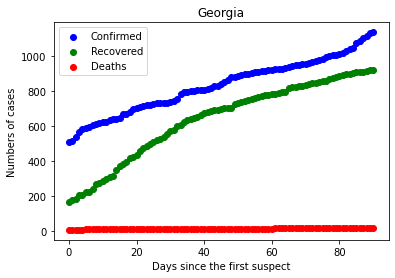

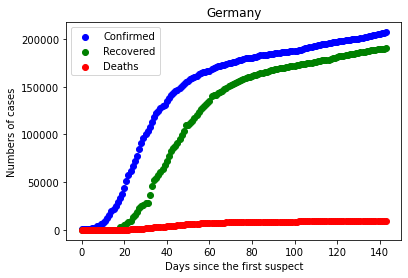

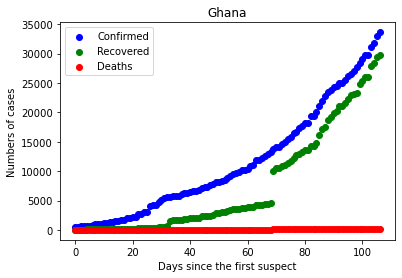

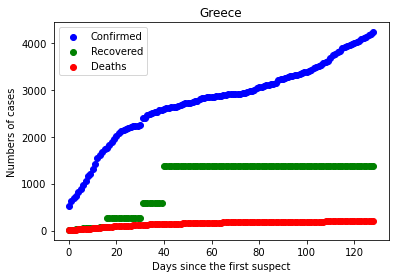

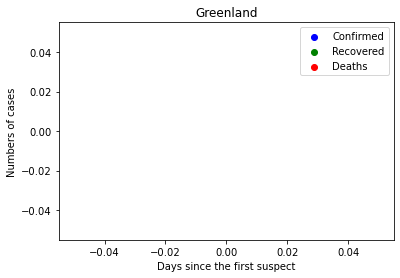

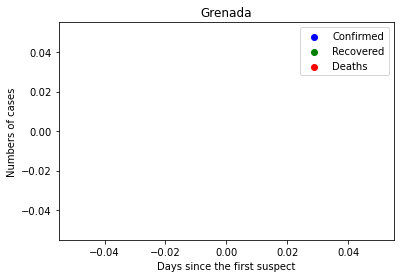

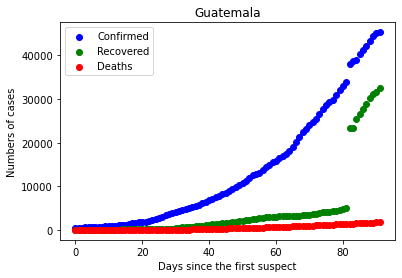

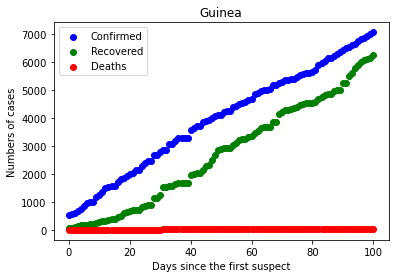

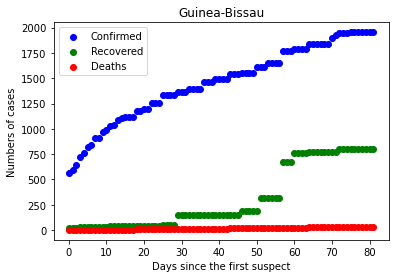

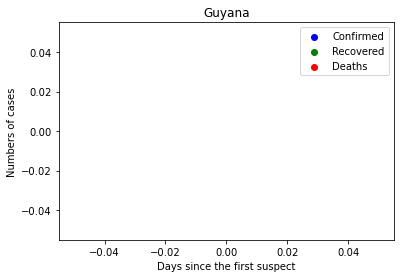

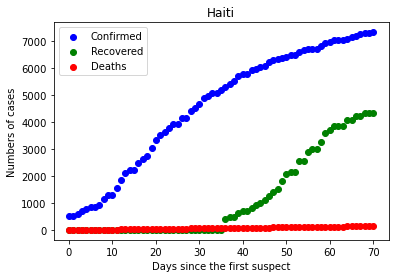

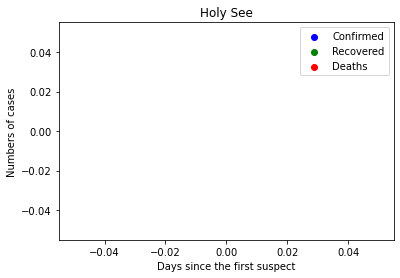

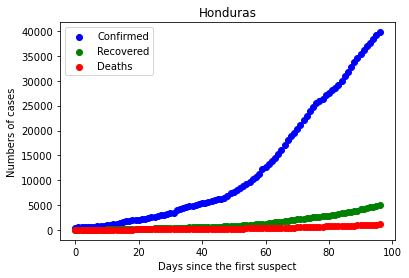

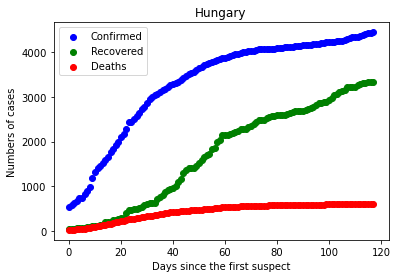

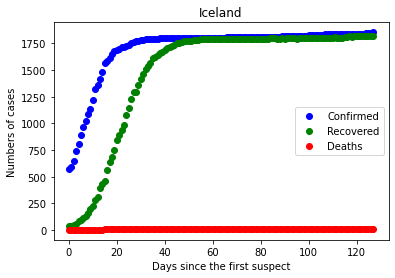

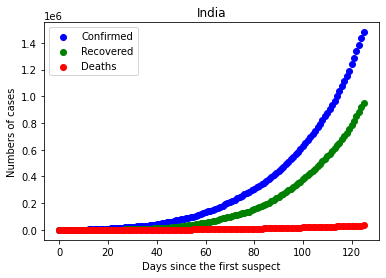

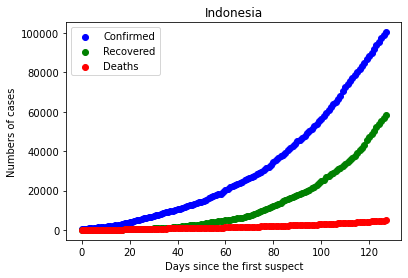

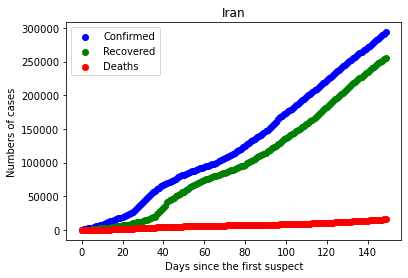

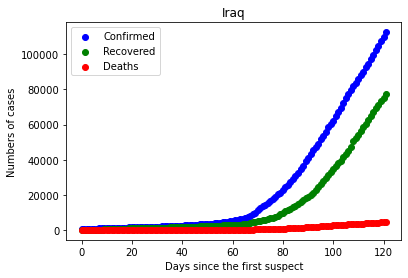

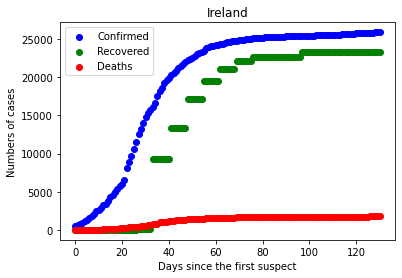

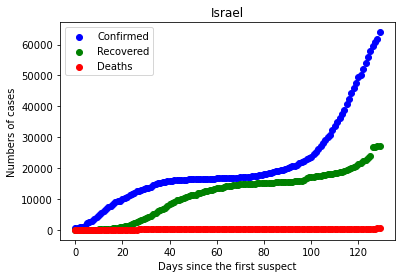

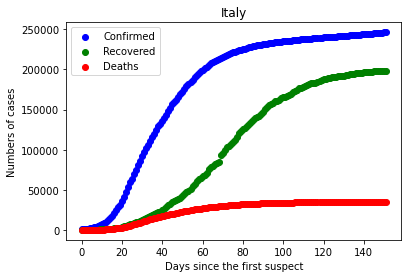

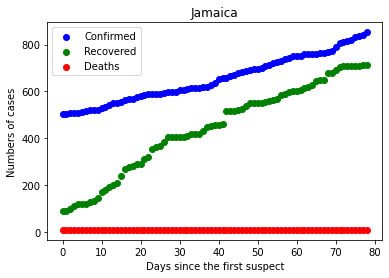

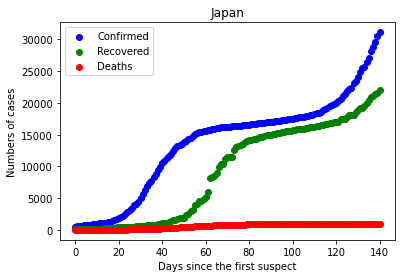

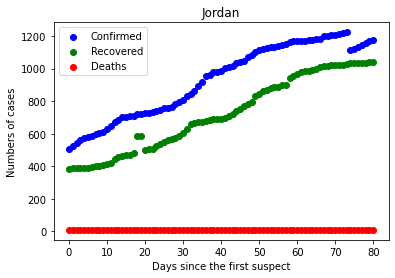

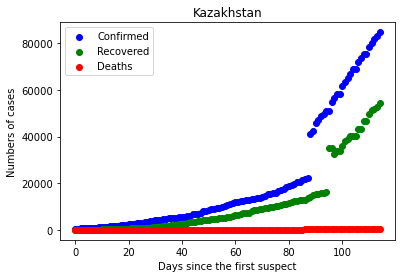

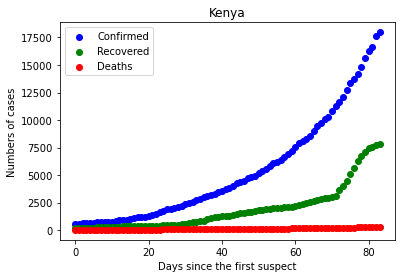

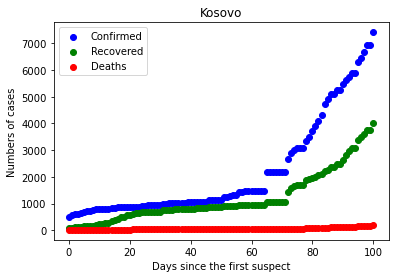

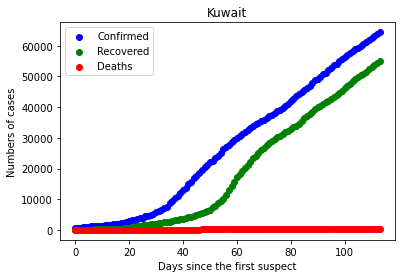

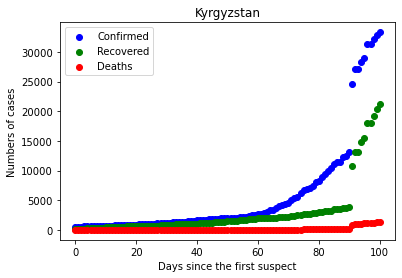

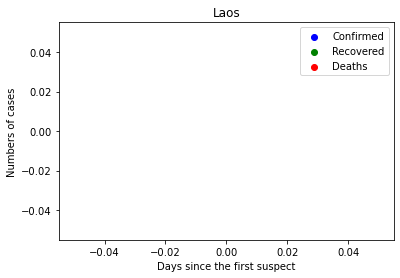

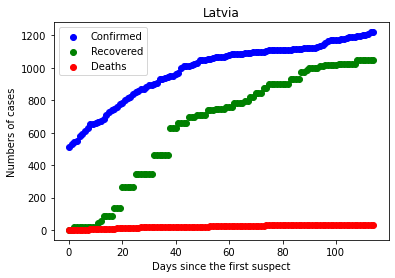

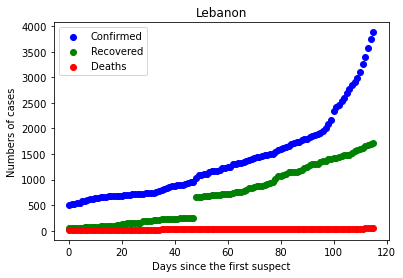

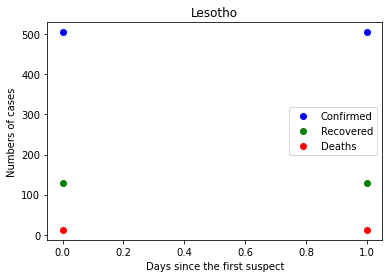

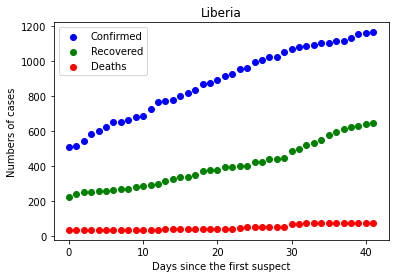

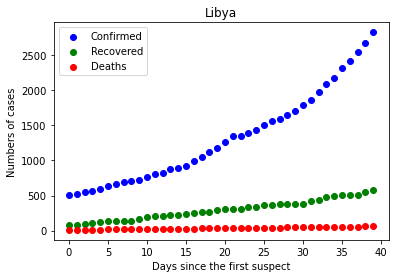

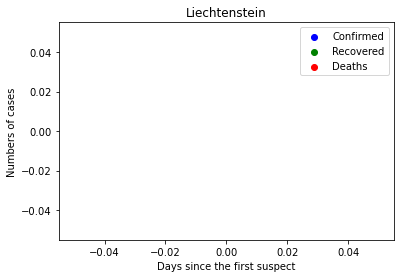

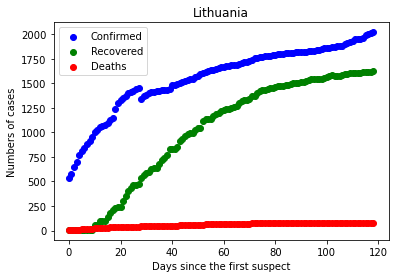

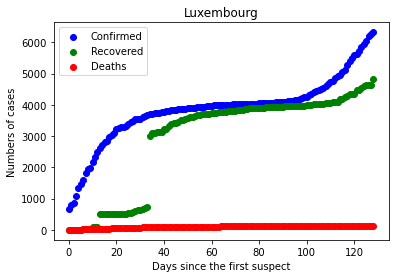

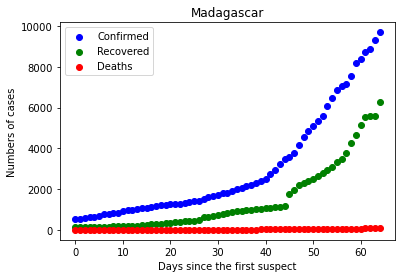

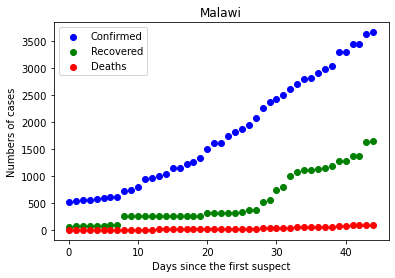

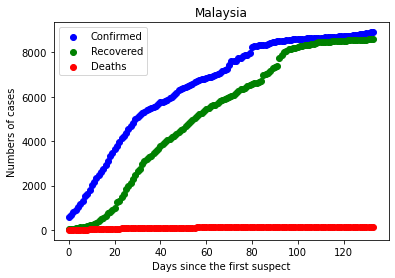

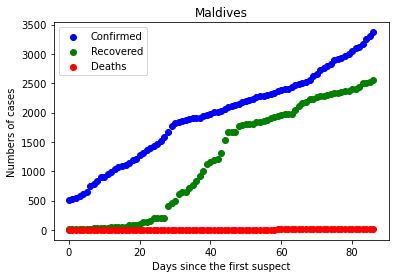

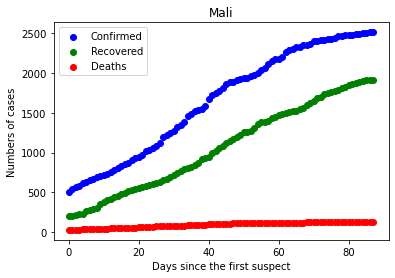

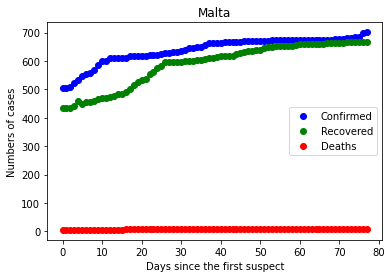

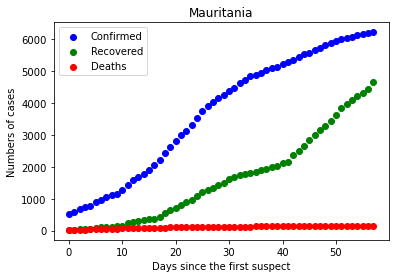

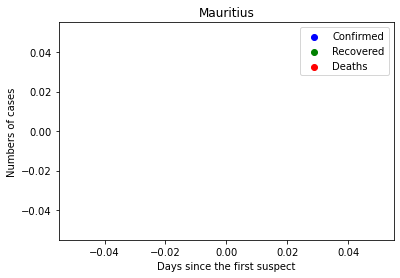

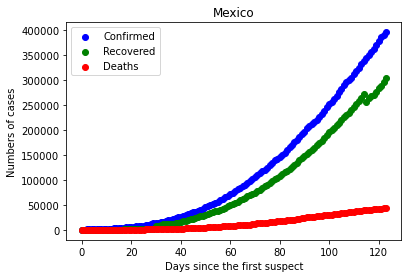

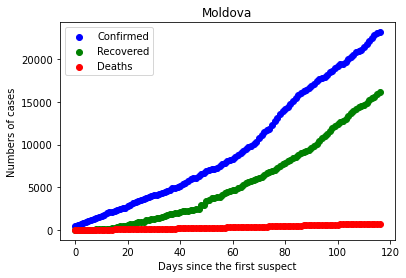

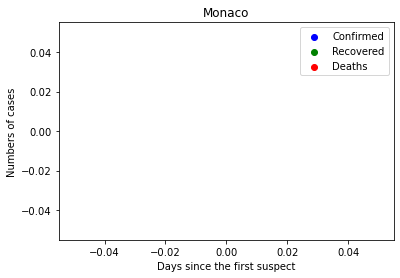

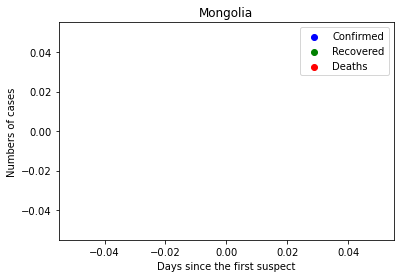

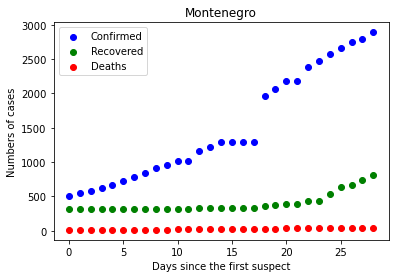

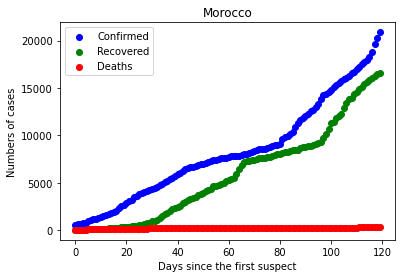

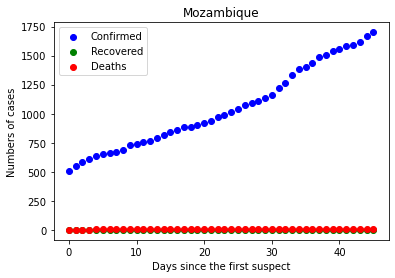

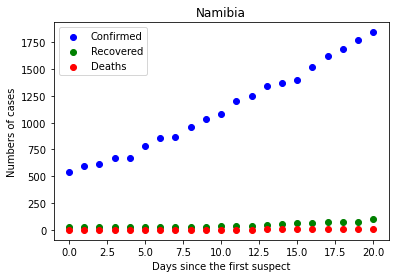

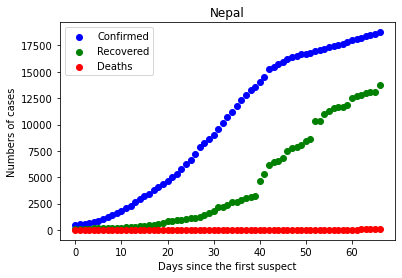

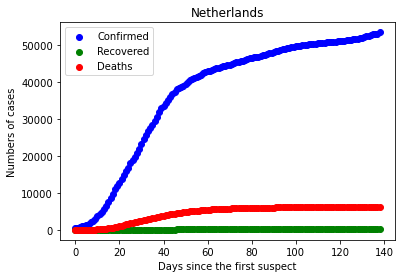

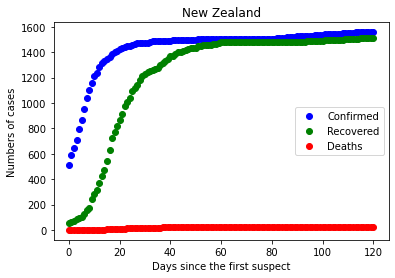

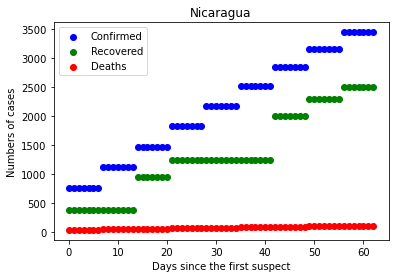

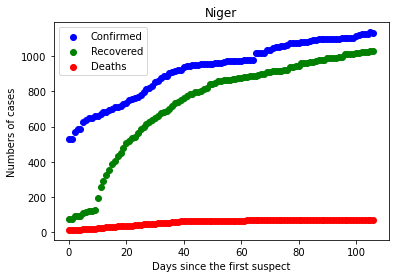

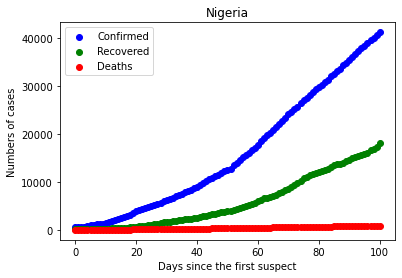

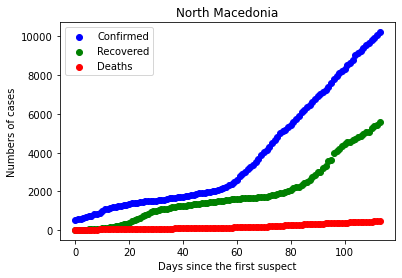

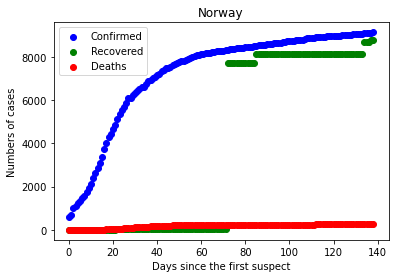

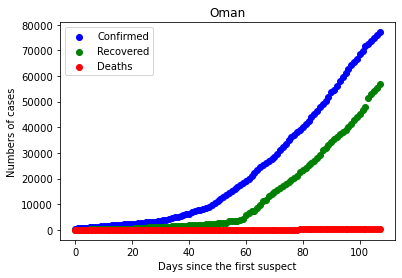

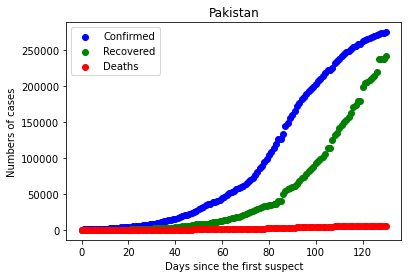

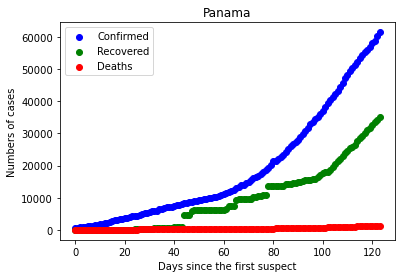

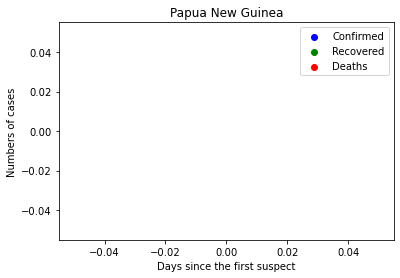

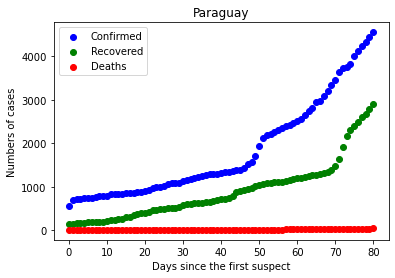

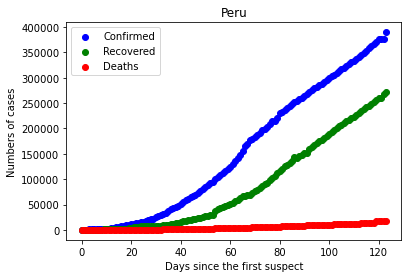

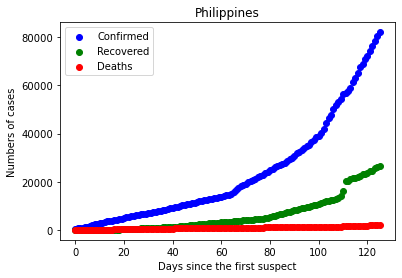

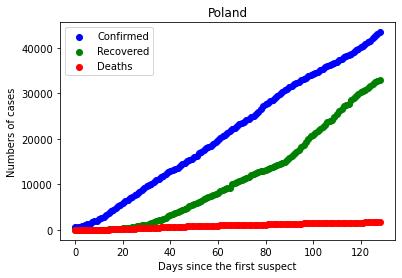

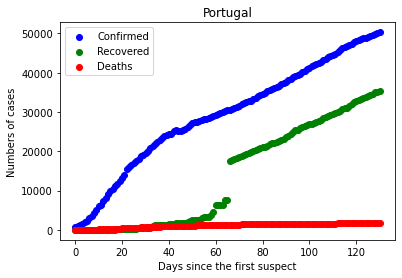

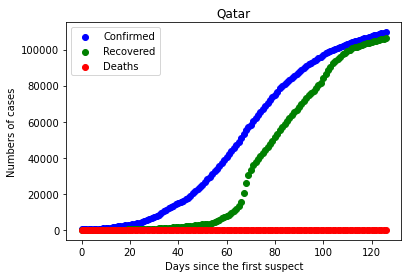

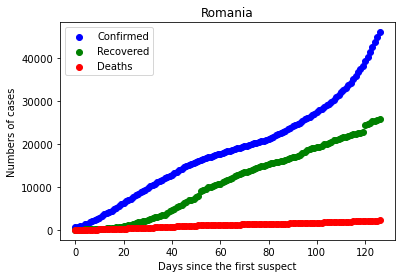

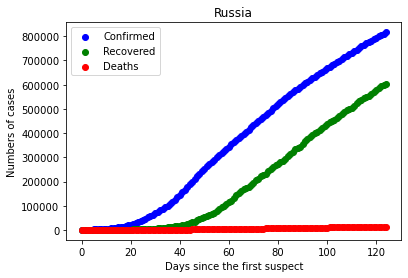

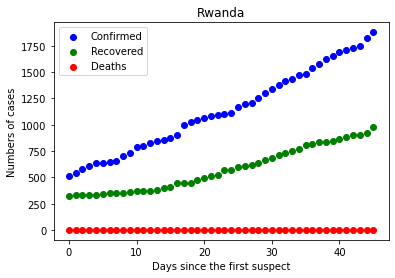

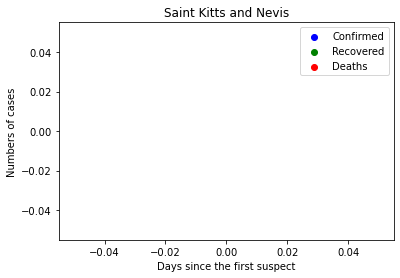

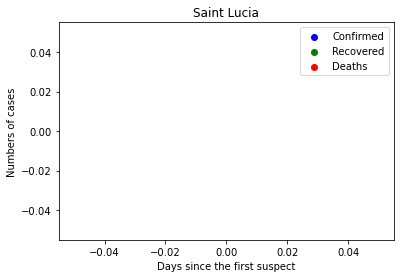

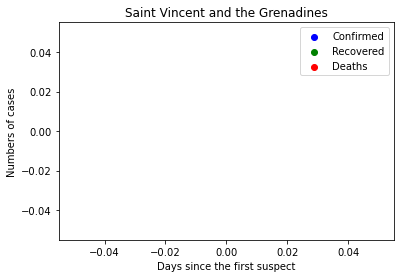

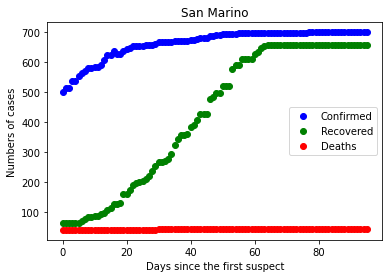

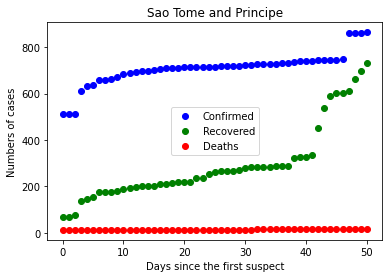

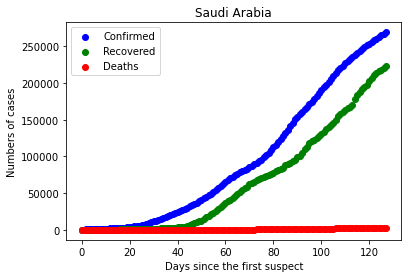

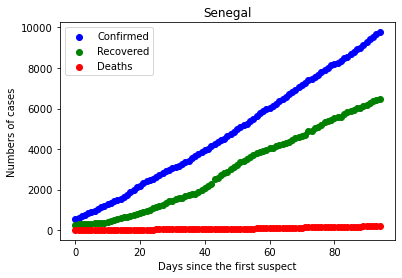

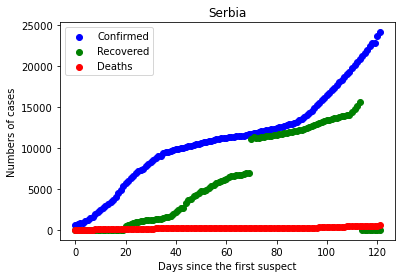

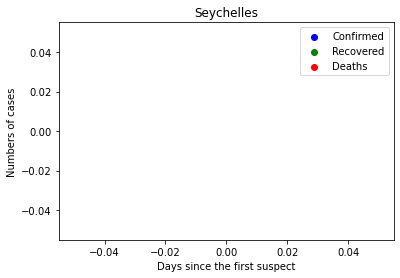

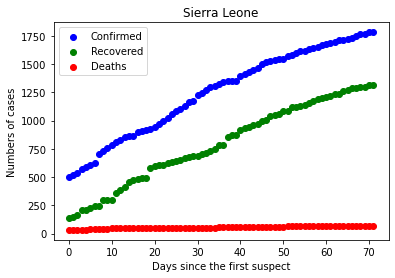

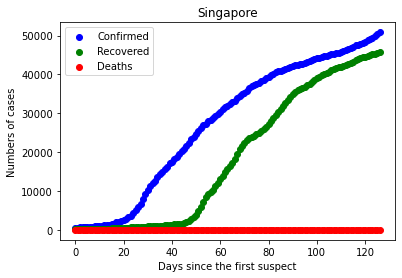

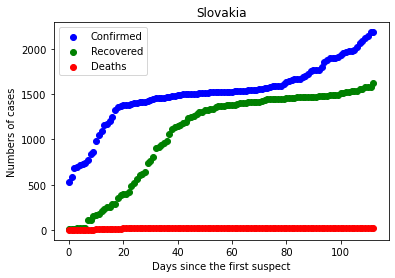

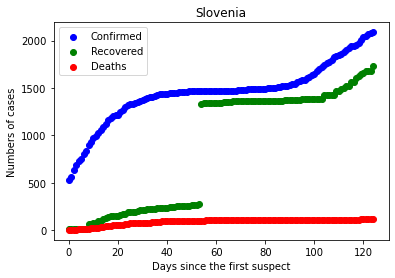

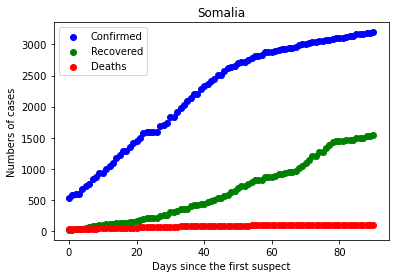

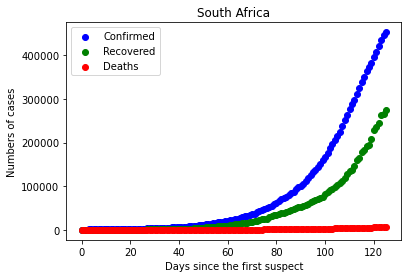

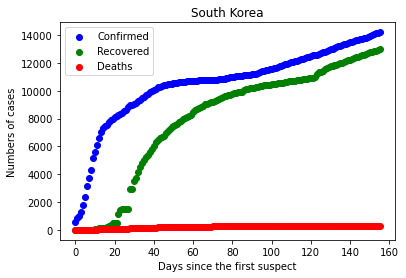

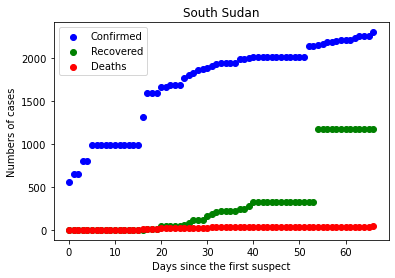

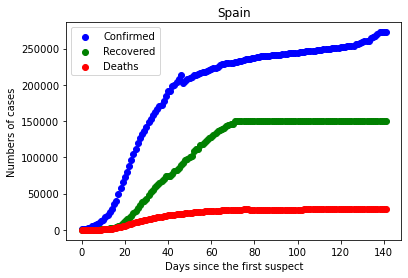

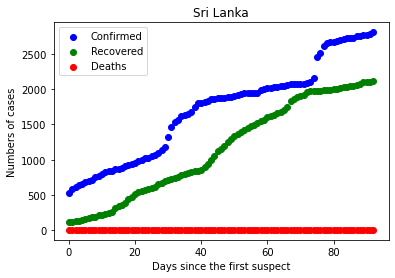

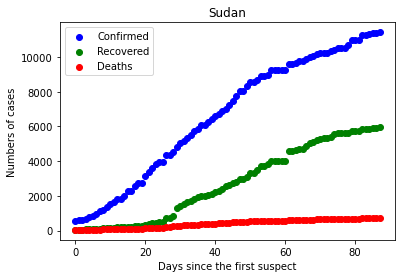

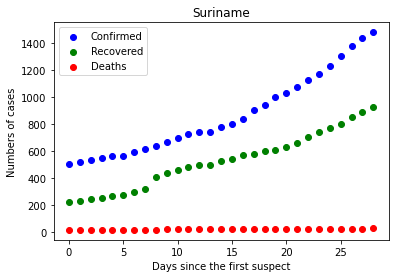

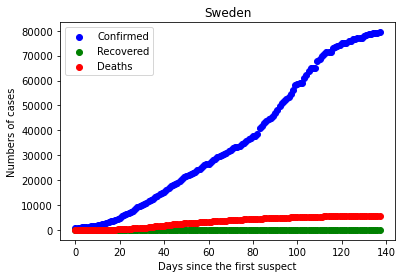

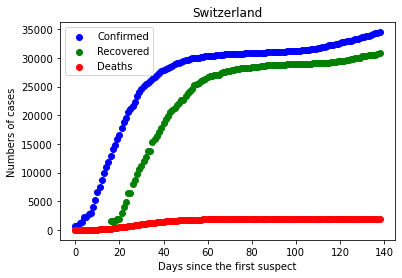

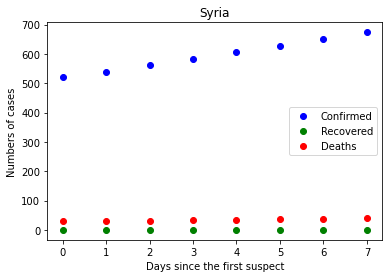

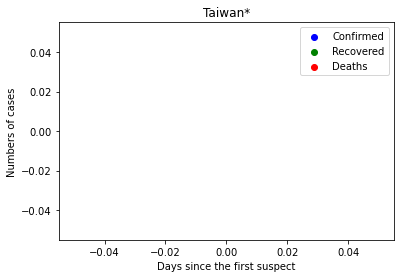

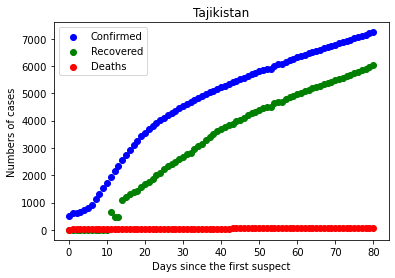

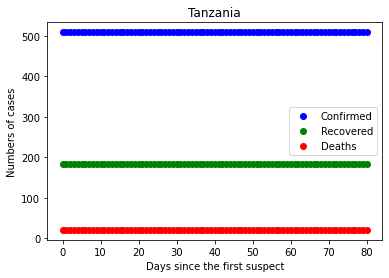

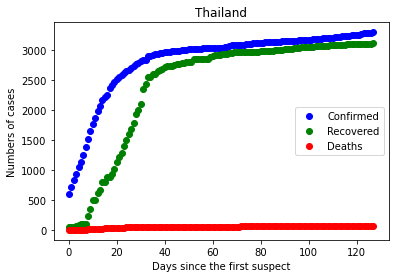

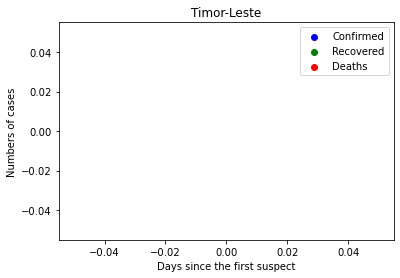

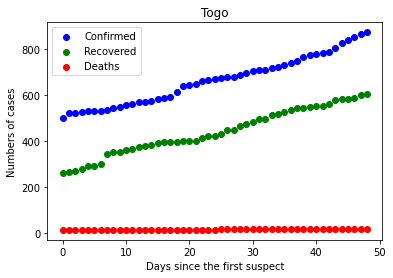

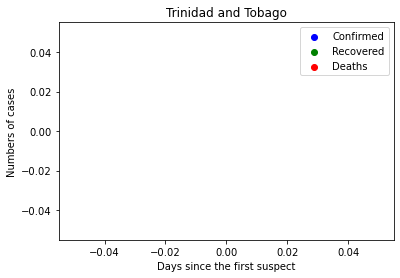

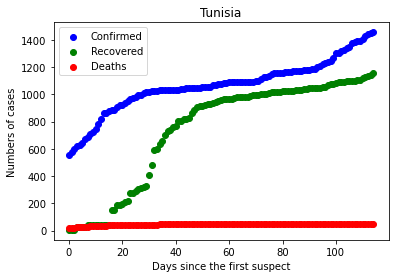

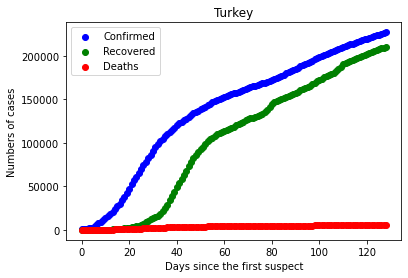

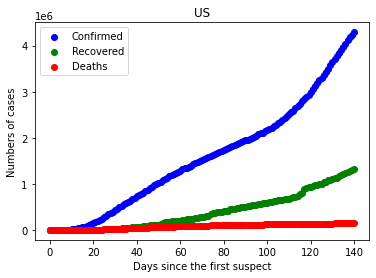

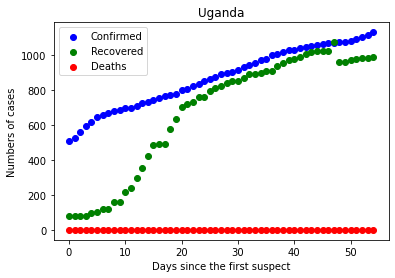

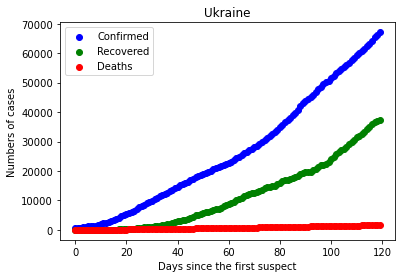

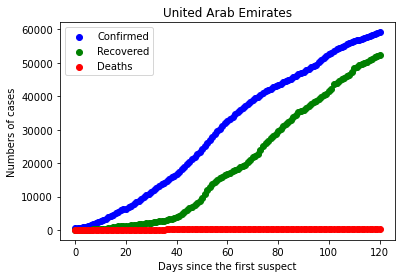

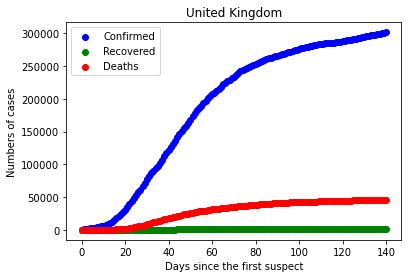

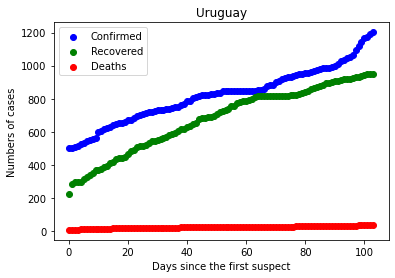

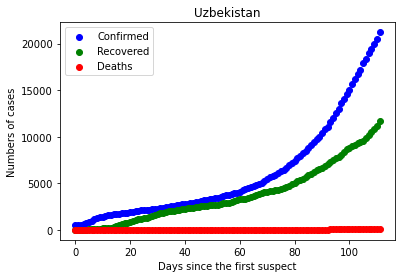

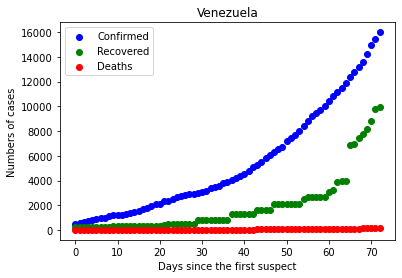

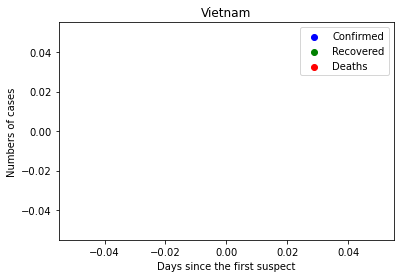

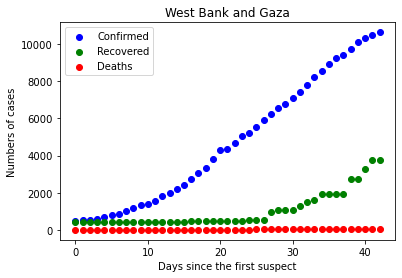

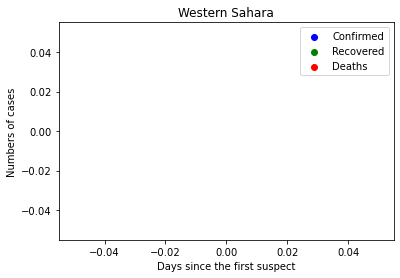

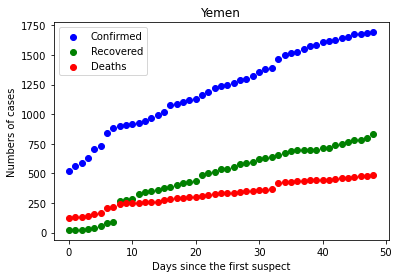

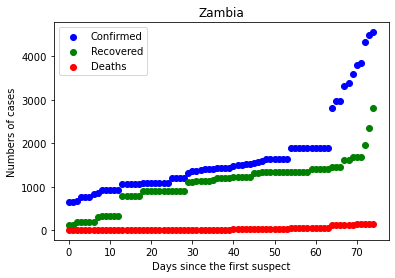

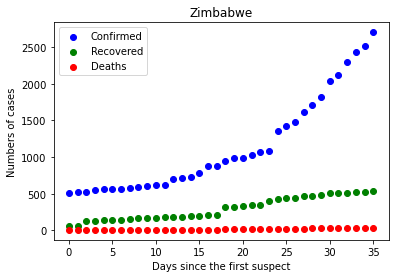

In [72]:
for idx in range(0,len(countries)):
    C=data4[data4['Country']==countries[idx]].reset_index()
    plt.scatter(np.arange(0,len(C)),C['Confirmed'],color='b',label='Confirmed')
    plt.scatter(np.arange(0,len(C)),C['Recovered'],color='g',label='Recovered')
    plt.scatter(np.arange(0,len(C)),C['Deaths'],color='r',label='Deaths')
    plt.title(countries[idx])
    plt.xlabel('Days since the first suspect')
    plt.ylabel('Numbers of cases')
    plt.legend()
    plt.show()

In [73]:
data5=data3.groupby(['Date'])[['Date','Confirmed','Deaths','Recovered']].sum().reset_index()

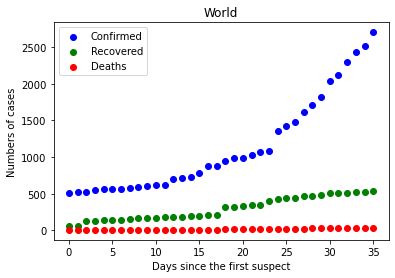

In [75]:
C1=data5
plt.scatter(np.arange(0,len(C)),C['Confirmed'],color='b',label='Confirmed')
plt.scatter(np.arange(0,len(C)),C['Recovered'],color='g',label='Recovered')
plt.scatter(np.arange(0,len(C)),C['Deaths'],color='r',label='Deaths')
plt.title('World')
plt.xlabel('Days since the first suspect')
plt.ylabel('Numbers of cases')
plt.legend()
plt.show()